# Figures

In [1]:
import pandas as pd
import plotly.graph_objects as go

colors = ['#ff3d44', '#ffb85c', '#fcfa62', '#80f569', '#74eafc', '#e969f5']
#          red        orange     yellow     green      blue       violet
colors = ['#ff3d44', '#74eafc', '#80f569', '#ffb85c', '#e969f5', '#fcfa62']
#          red        blue       green      orange     violet     yellow
df = pd.read_csv('./kangaroo.csv', encoding='utf-8')  

### go.scatter (species by year)

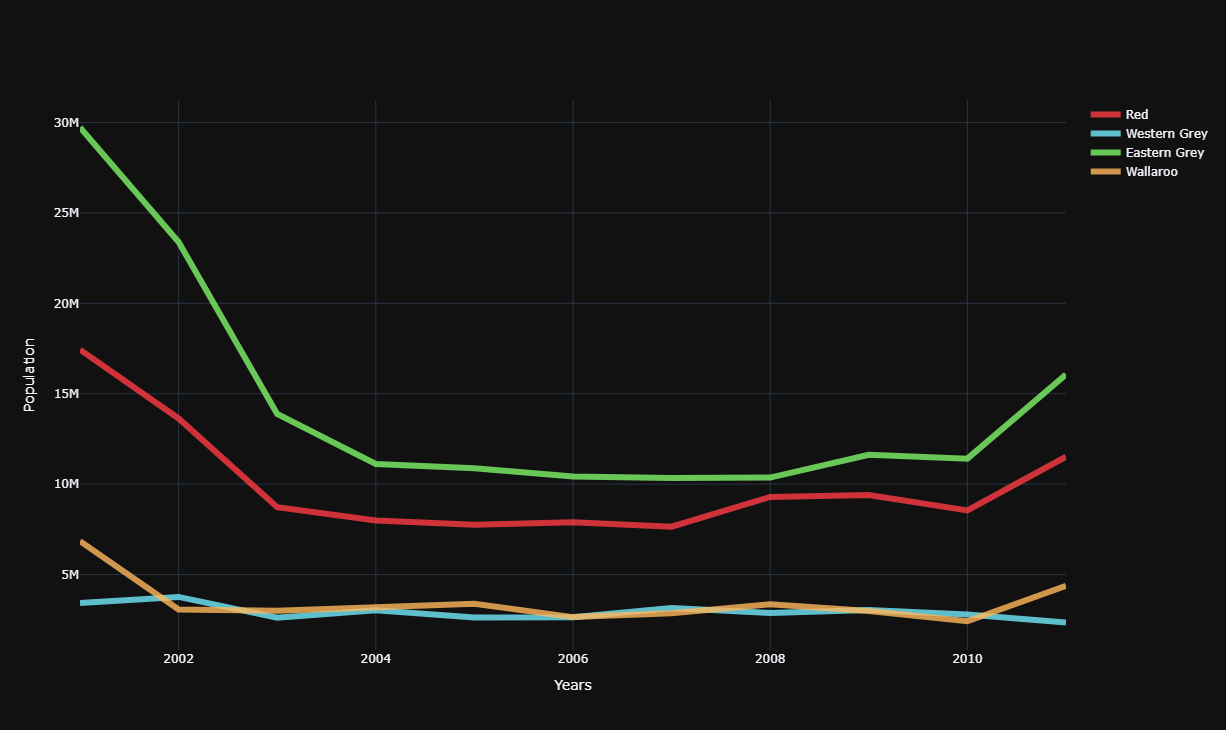

In [5]:
df_a = df.groupby(['Year']).sum()
df_a.drop('State', axis=1, inplace=True)
df_a.reset_index(inplace=True)
fig_a = go.Figure()
for i in range(len(df_a.columns[1:])):
    fig_a.add_trace(go.Scatter(x = df_a.Year.to_list(), 
                               y = df_a[df_a.columns[1:][i]].to_list(), 
                               opacity = 0.8, 
                               mode = 'lines', 
                               name = df_a.columns[1:][i], 
                               marker = dict(color=colors[i]),
                               line = dict(width=6.0),))
fig_a.update_layout(xaxis_title='Years', yaxis_title='Population', 
                    template = 'plotly_dark', width=790, height=730)

### go.scatter (province by year)

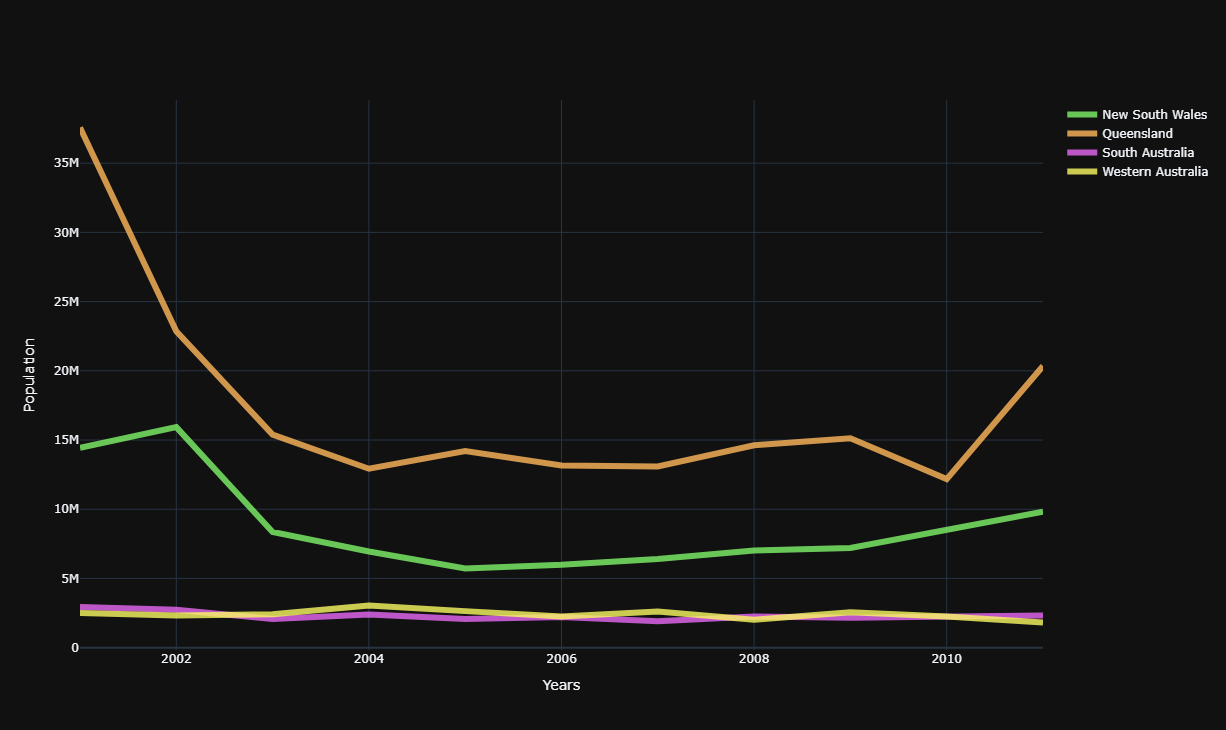

In [4]:
df_b = df.loc[:]
df_b['Total'] = df_b.sum(axis=1, numeric_only=True)
df_b = df_b[['Year','State','Total']]
df_b = df_b.groupby(['Year', 'State']).mean()
df_b = df_b.pivot_table(values='Total', index='Year', columns='State').reset_index()
df_b.rename_axis(None, axis=1, inplace=True)
fig_b = go.Figure()
for i in range(len(df_b.columns[1:])):
    fig_b.add_trace(go.Scatter(x = df_b.Year.to_list(), 
                             y = df_b[df_b.columns[1:][i]].to_list(), 
                             opacity = 0.8,
                             mode='lines', 
                             marker=dict(color=colors[2+i]), 
                             name=df_b.columns[1:][i],
                             line = dict(width=6.0),))
fig_b.update_layout(xaxis_title='Years', yaxis_title='Population', 
                  template = 'plotly_dark', width=790, height=730)